In [1]:
print("Bissmillahirrahmanirrahim top 50 product capstone")

Bissmillahirrahmanirrahim top 50 product capstone


In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


downloading our facential datasets

In [3]:
#Download the training set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_train.zip

--2023-05-26 06:17:56--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 642900160 (613M) [application/zip]
Saving to: ‘faceSkin_types_train.zip’

faceSkin_types_trai 100%[===================>] 613.12M  16.4MB/s    in 40s     

2023-05-26 06:18:38 (15.4 MB/s) - ‘faceSkin_types_train.zip’ saved [642900160/642900160]



In [4]:
#Download the validation set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_validation.zip


--2023-05-26 06:18:38--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172197856 (164M) [application/zip]
Saving to: ‘faceSkin_types_validation.zip’

faceSkin_types_vali 100%[===================>] 164.22M  15.1MB/s    in 13s     

2023-05-26 06:18:52 (12.7 MB/s) - ‘faceSkin_types_validation.zip’ saved [172197856/172197856]



download the pretrained model (RESNET50)


In [5]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:

!wget https://storage.googleapis.com/facentiap-dataset-zip/vgg_face_weights.h5


--2023-05-26 06:18:52--  https://storage.googleapis.com/facentiap-dataset-zip/vgg_face_weights.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580085408 (553M) [application/octet-stream]
Saving to: ‘vgg_face_weights.h5’

vgg_face_weights.h5 100%[===================>] 553.21M  16.7MB/s    in 36s     

2023-05-26 06:19:30 (15.3 MB/s) - ‘vgg_face_weights.h5’ saved [580085408/580085408]



unzip validation dan train dataset


In [7]:
import os
import zipfile

# Unzip training set
local_zip = './faceSkin_types_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_types_train')

# Unzip validation set
local_zip = './faceSkin_types_validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_types_validation')

zip_ref.close()

 define the directories containing your images

In [8]:
# variabel directory for training pict for each category
train_oily_dir = os.path.join("./faceSkin_types_train/oily")
train_normal_dir = os.path.join("./faceSkin_types_train/normal")
train_combination_dir =os.path.join("./faceSkin_types_train/combination")
train_sensitive_dir = os.path.join("./faceSkin_types_train/sensitive")
train_dry_dir = os.path.join("./faceSkin_types_train/dry")

# variabel directory for validation pict for each category
validation_oily_dir =os.path.join("/content/faceSkin_types_validation/oily")
validation_normal_dir =os.path.join("/content/faceSkin_types_validation/normal")
validation_combination_dir =os.path.join("/content/faceSkin_types_validation/combination")
validation_sensitive_dir =os.path.join("/content/faceSkin_types_validation/sensitive")
validation_dry_dir =os.path.join("/content/faceSkin_types_validation/dry")

filenames check in directory

In [9]:
train_dry_names = os.listdir(train_dry_dir)
train_oily_names = os.listdir(train_oily_dir)
train_normal_names =  os.listdir(train_normal_dir)
train_combination_names =  os.listdir(train_combination_dir)
train_sensitive_names =  os.listdir(train_sensitive_dir)

validation_dry_names = os.listdir(validation_dry_dir)
validation_oily_names = os.listdir(validation_oily_dir)
validation_normal_names =  os.listdir(validation_normal_dir)
validation_combination_names =  os.listdir(validation_combination_dir)
validation_sensitive_names =  os.listdir(validation_sensitive_dir)

print(f'TRAIN SET DRY: {train_dry_names[:5]}')
print(f'TRAIN SET OILY: {train_dry_names[:5]}')
print(f'TRAIN SET SENSITIVE: {train_dry_names[:5]}')
print(f'TRAIN SET COMBINATION: {train_dry_names[:5]}')
print(f'TRAIN SET NORMAL: {train_dry_names[:5]} \n')

print(f'VALIDATION SET DRY: {validation_dry_names[:5]}')
print(f'VALIDATION SET OILY: {validation_dry_names[:5]}')
print(f'VALIDATION SET SENSITIVE: {validation_dry_names[:5]}')
print(f'VALIDATION SET COMBINATION: {validation_dry_names[:5]}')
print(f'VALIDATION SET NORMAL: {validation_dry_names[:5]}')

TRAIN SET DRY: ['1 (161).jpg', '1 (81).jpg', '1 (127).jpg', '1 (171).jpg', '1 (131).jpg']
TRAIN SET OILY: ['1 (161).jpg', '1 (81).jpg', '1 (127).jpg', '1 (171).jpg', '1 (131).jpg']
TRAIN SET SENSITIVE: ['1 (161).jpg', '1 (81).jpg', '1 (127).jpg', '1 (171).jpg', '1 (131).jpg']
TRAIN SET COMBINATION: ['1 (161).jpg', '1 (81).jpg', '1 (127).jpg', '1 (171).jpg', '1 (131).jpg']
TRAIN SET NORMAL: ['1 (161).jpg', '1 (81).jpg', '1 (127).jpg', '1 (171).jpg', '1 (131).jpg'] 

VALIDATION SET DRY: ['1 (215).jpg', '1 (192).jpg', '1 (190).jpg', '1 (188).jpg', '1 (210).jpg']
VALIDATION SET OILY: ['1 (215).jpg', '1 (192).jpg', '1 (190).jpg', '1 (188).jpg', '1 (210).jpg']
VALIDATION SET SENSITIVE: ['1 (215).jpg', '1 (192).jpg', '1 (190).jpg', '1 (188).jpg', '1 (210).jpg']
VALIDATION SET COMBINATION: ['1 (215).jpg', '1 (192).jpg', '1 (190).jpg', '1 (188).jpg', '1 (210).jpg']
VALIDATION SET NORMAL: ['1 (215).jpg', '1 (192).jpg', '1 (190).jpg', '1 (188).jpg', '1 (210).jpg']


chacking total number of images for each categories in training and validation directories 

In [10]:
print(f'total training oily images: {len(os.listdir(train_oily_dir))}')
print(f'total training dry images: {len(os.listdir(train_dry_dir))}')
print(f'total training normal images: {len(os.listdir(train_normal_dir))}')
print(f'total training combination images: {len(os.listdir(train_combination_dir))}')
print(f'total training sensitive images: {len(os.listdir(train_sensitive_dir))}\n')


print(f'total validation oily images: {len(os.listdir(validation_oily_dir))}')
print(f'total validation dry images: {len(os.listdir(validation_dry_dir))}')
print(f'total validation normal images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation combination images: {len(os.listdir(validation_combination_dir))}')
print(f'total validation sensitive images: {len(os.listdir(validation_sensitive_dir))}')




total training oily images: 44
total training dry images: 42
total training normal images: 57
total training combination images: 22
total training sensitive images: 12

total validation oily images: 12
total validation dry images: 11
total validation normal images: 15
total validation combination images: 6
total validation sensitive images: 4


# Data preprocessing


using image data generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale=1/255,
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './faceSkin_types_train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './faceSkin_types_validation',  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

Found 177 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


load pretrained model

In [12]:
!python --version

Python 3.10.11


solusi kalo cell dibawah ga worked https://shubhasmitaroy.medium.com/for-those-who-get-an-error-on-importing-vggface-related-packages-e5afdd0c3f01

In [14]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [19]:
import keras

from keras_vggface.vggface import VGGFace
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/content/vgg_face_weights.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = VGGFace(input_shape = (224, 224, 3), 
                                include_top = False, 
                                model = 'vgg16')

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file, by_name=True, skip_mismatch=True)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [20]:
pre_trained_model.summary()


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [21]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('pool5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 7, 7, 512)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='pool5/MaxPool:0', description="created by layer 'pool5'")


# add dense layer depends on the classification (5 category)


In [22]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

# Building Model (klo ga pake transfer learning)

In [23]:

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
    
#     # will give a 5 output value, 
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

compiling the model

In [24]:
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import adam

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training

In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 - 82s - loss: 2.1130 - accuracy: 0.2000 - val_loss: 2.5548 - val_accuracy: 0.3000 - 82s/epoch - 10s/step
Epoch 2/10
8/8 - 75s - loss: 2.1305 - accuracy: 0.2750 - val_loss: 1.6528 - val_accuracy: 0.2750 - 75s/epoch - 9s/step
Epoch 3/10
8/8 - 81s - loss: 1.6625 - accuracy: 0.2973 - val_loss: 1.4179 - val_accuracy: 0.4750 - 81s/epoch - 10s/step
Epoch 4/10
8/8 - 80s - loss: 1.5498 - accuracy: 0.3500 - val_loss: 1.5513 - val_accuracy: 0.5000 - 80s/epoch - 10s/step
Epoch 5/10
8/8 - 73s - loss: 1.5030 - accuracy: 0.3750 - val_loss: 1.7228 - val_accuracy: 0.3250 - 73s/epoch - 9s/step
Epoch 6/10
8/8 - 72s - loss: 1.7470 - accuracy: 0.4750 - val_loss: 1.6816 - val_accuracy: 0.2250 - 72s/epoch - 9s/step
Epoch 7/10
8/8 - 76s - loss: 1.4917 - accuracy: 0.4000 - val_loss: 1.8440 - val_accuracy: 0.3000 - 76s/epoch - 9s/step
Epoch 8/10
8/8 - 73s - loss: 1.5575 - accuracy: 0.3250 - val_loss: 1.6014 - val_accuracy: 0.4750 - 73s/epoch - 9s/step
Epoch 9/10
8/8 - 74s - loss: 1.4864 - accurac

In [26]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# evaluating accuracy and loss for the model


<Figure size 640x480 with 0 Axes>

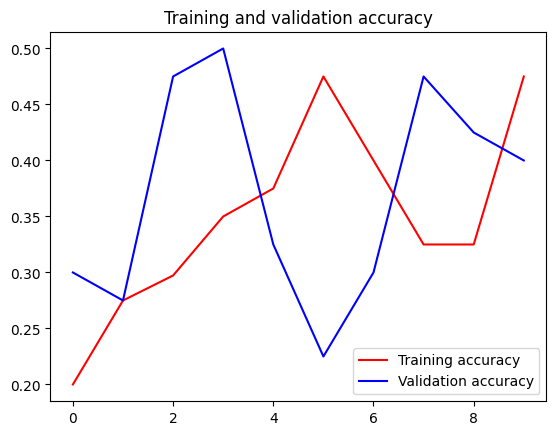

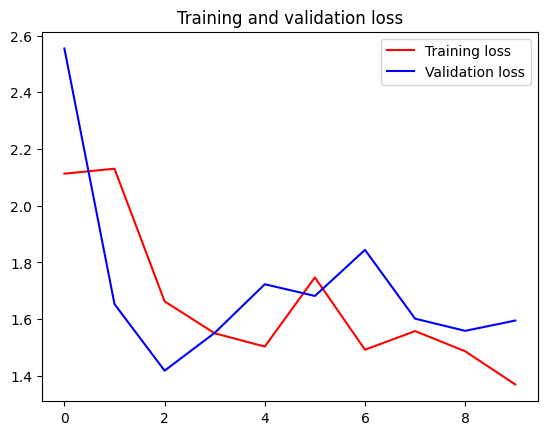

<Figure size 640x480 with 0 Axes>

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='Training loss')
plt.plot  ( epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()


In [29]:

from keras.models import load_model

model.save('/content/drive/MyDrive/saved model/model_vggFace_23mei.h5')

# Convert to Tensorflow LITE

In [30]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [32]:
import pathlib

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.12.0


In [34]:
!mkdir saved_TFLITE_model

generate SavedModel

In [35]:
export_dir = "/content/saved_TFLITE_model"
tf.saved_model.save(model, export_dir)

Convert the SavedModel to TFLite

In [36]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [39]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/saved model/model_VGGFace.tflite')
tflite_model_file.write_bytes(tflite_model)

161638532

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass